In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

from scipy.signal import find_peaks

from neurodsp import sim
from neurodsp import filt
from neurodsp import spectral

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,6)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})


In [2]:
nsec = 100.
fs = 1000
# Define the frequency band of interest
fc = (8,12)

data = sim.aperiodic.sim_powerlaw(nsec, fs, exponent=-1.6)
data = data + sim.sim_oscillation(nsec, fs, freq=12, cycle='sawtooth', width=0.3)
data = filt.filter_signal(data, fs, 'highpass', 1.)

# Filter the data
alpha_data = filt.filter_signal(data, fs, 'bandpass', f_range=fc)

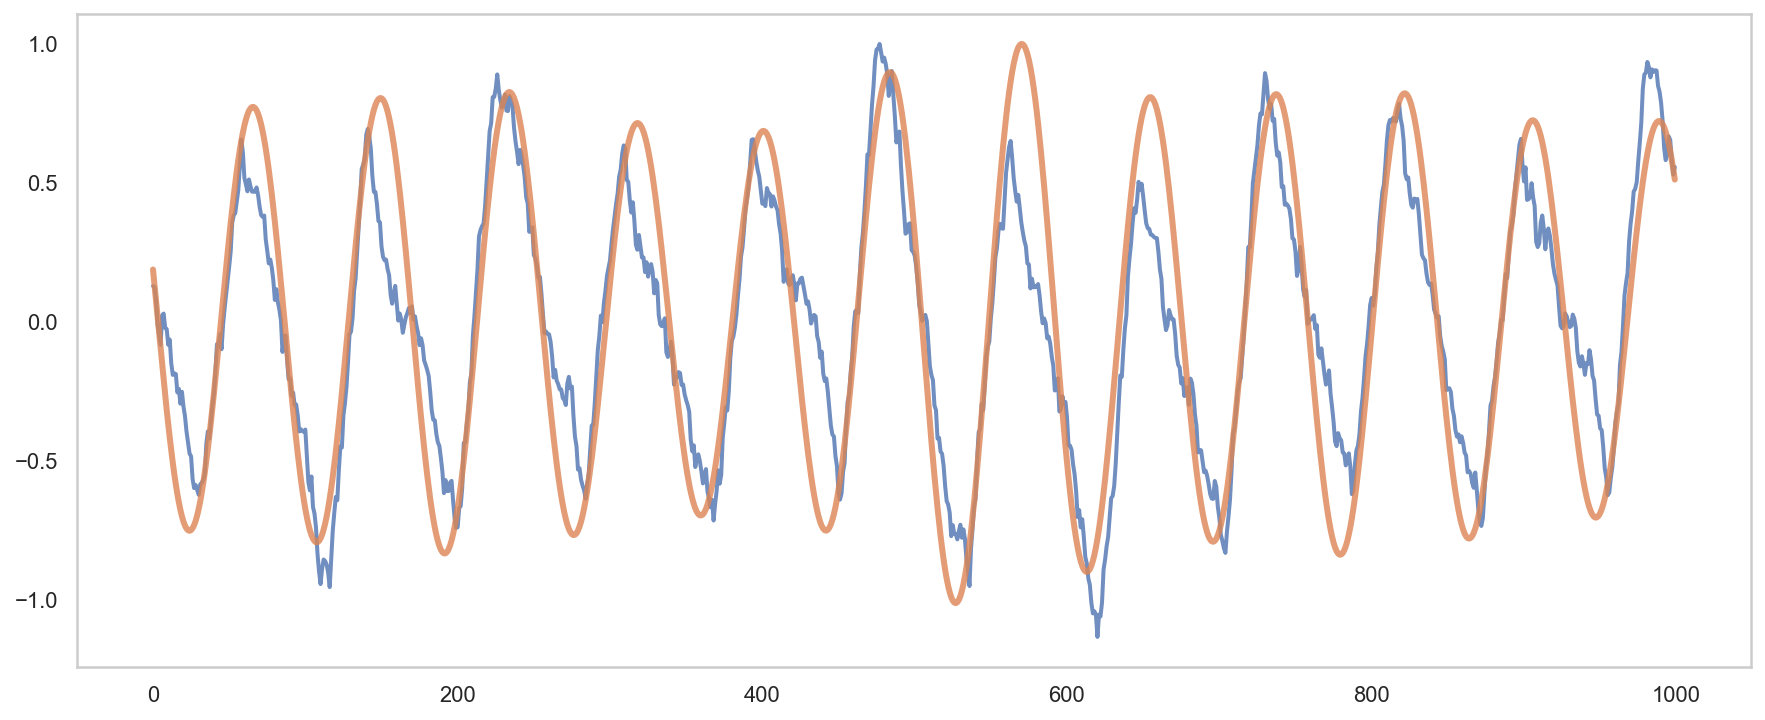

In [4]:
alpha_data_short = alpha_data[4000:5000]
alpha_data_short = alpha_data_short / np.max(alpha_data_short)
alpha_data_short = alpha_data_short[np.logical_not(np.isnan(alpha_data_short))]

data_short = data[4000:5000]
data_short = data_short / np.max(data_short)
data_short = data_short[np.logical_not(np.isnan(data_short))]

plt.plot(data_short, alpha=0.8, linewidth = 2.)
plt.plot(alpha_data_short, alpha=0.8, linewidth = 3.)
plt.show()


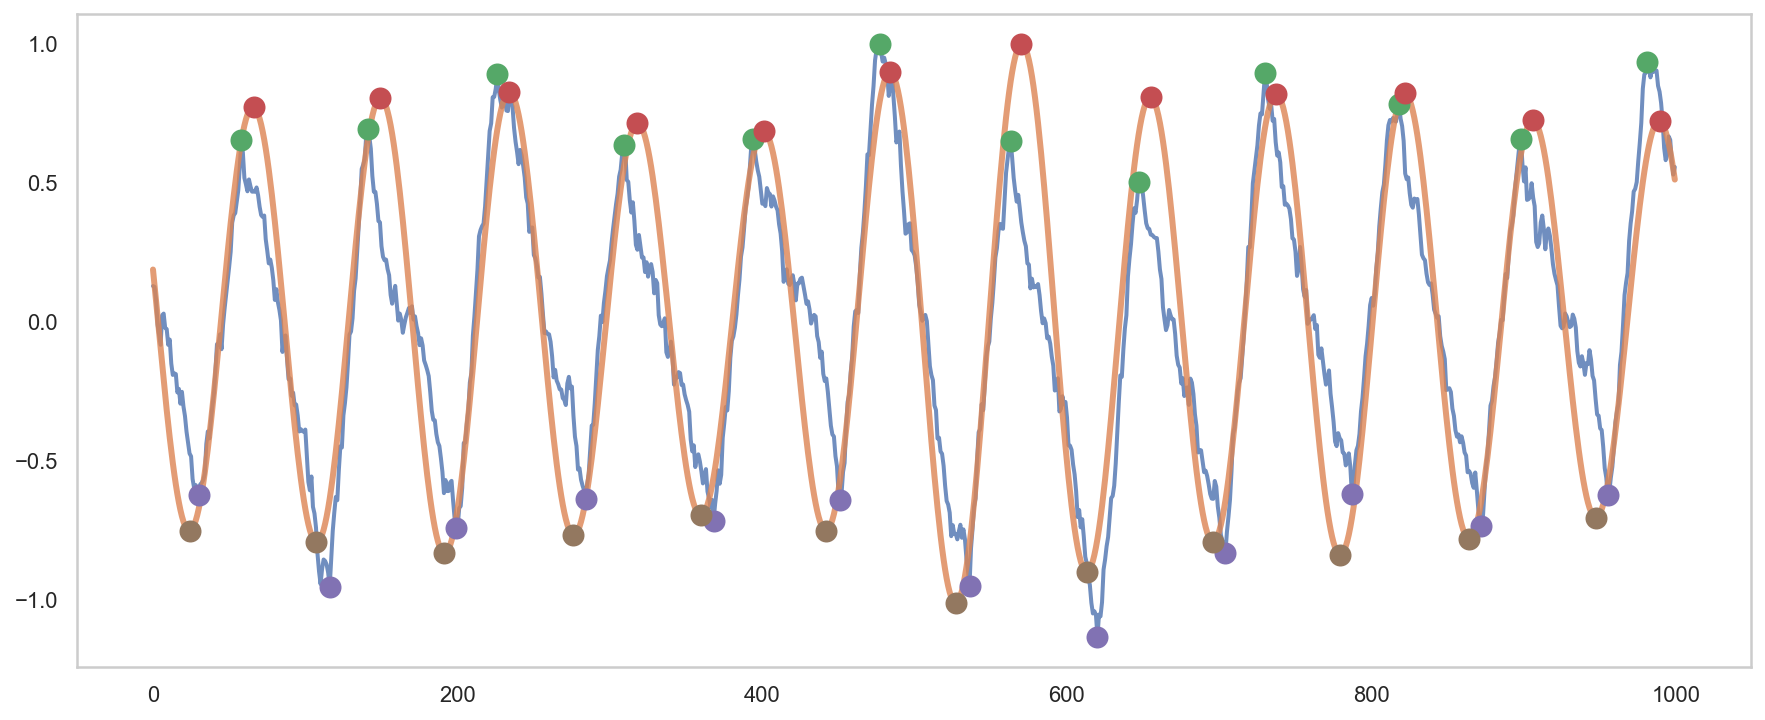

7.416666666666667 8.0


In [5]:
separation = 60

peaks, _ = find_peaks(data_short, distance=separation)
apeaks, _ = find_peaks(alpha_data_short, distance=separation)

troughs, _ = find_peaks(-data_short, distance=separation)
atroughs, _ = find_peaks(-alpha_data_short, distance=separation)


plt.plot(data_short, alpha=0.8, linewidth = 2.)
plt.plot(alpha_data_short, alpha=0.8, linewidth = 3.)
plt.plot(peaks, data_short[peaks], 'o', markersize = 10.)
plt.plot(apeaks, alpha_data_short[apeaks], 'o', markersize = 10.)
plt.plot(troughs, data_short[troughs], 'o', markersize = 10.)
plt.plot(atroughs, alpha_data_short[atroughs], 'o', markersize = 10.)
plt.show()
print(np.mean(apeaks-peaks), np.mean(troughs-atroughs))

/var/folders/_x/fjk_0tsx1sl4yvjz3z1xq7540000gn/T/ipykernel_71066/1796947051.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((0, 250))


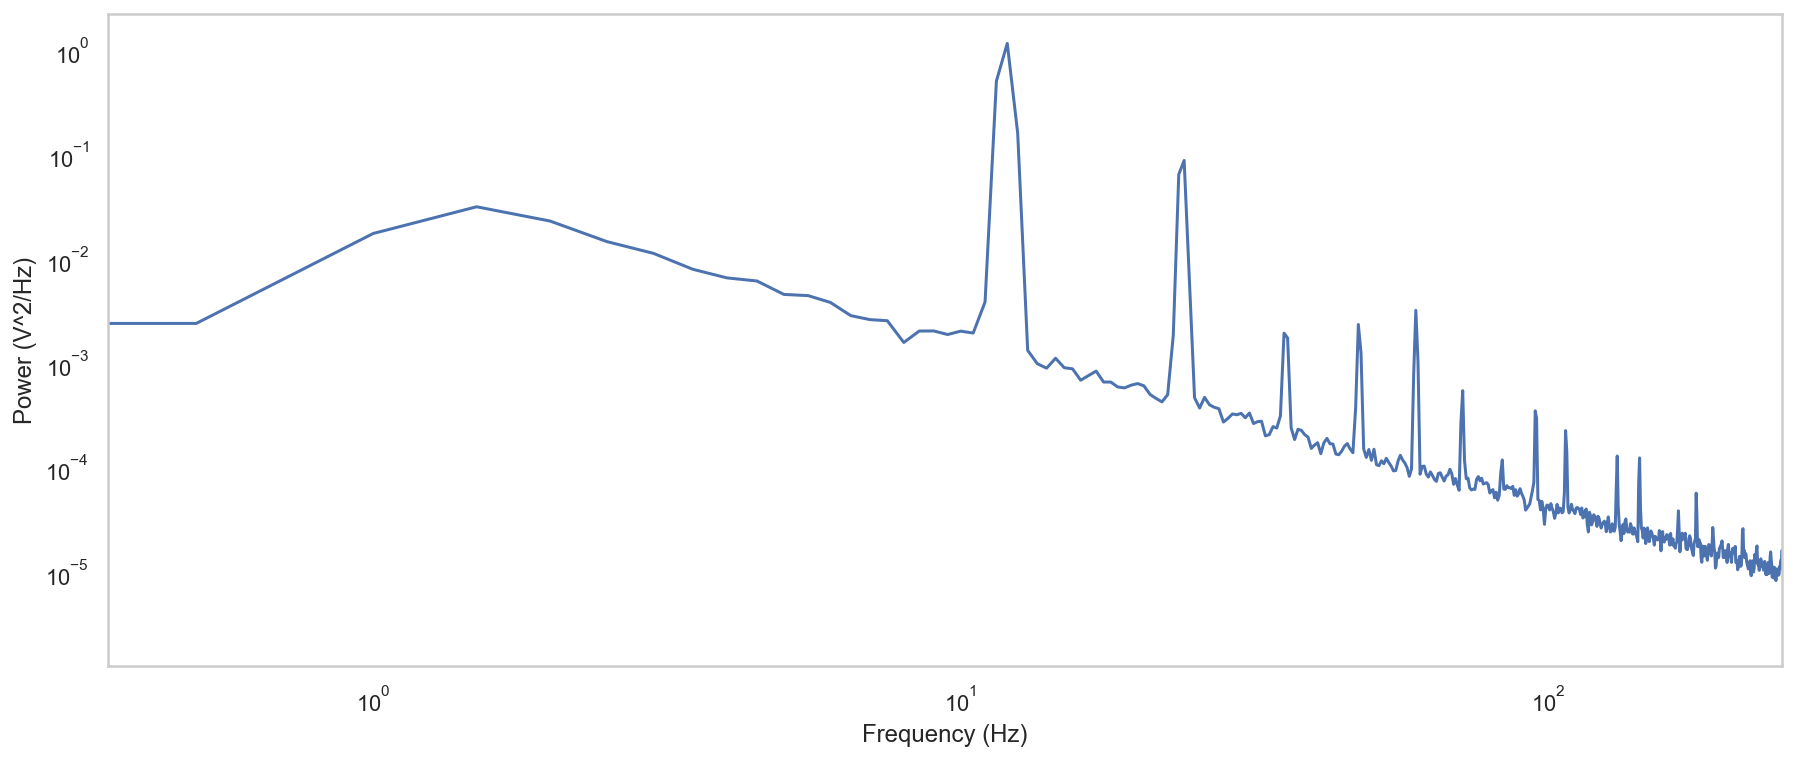

In [6]:
data = data[np.logical_not(np.isnan(data))]

freq_mean, P_mean = spectral.compute_spectrum(data, fs, method='welch', window='hann', nperseg=fs*2) # mean of spectrogram (Welch)

plt.loglog(freq_mean, P_mean)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.xlim((0, 250))
plt.show()
